# Activation Functions

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
x = torch.arange(-5., 5., 0.1)

## ReLU (Rectified Linear Unit) 

### Definition
$$
\text{ReLU}(x) = \max(x,0)
$$

* ✅ simple and computationally cheap. 
* ❌ ReLu units can be fragile during trainning an "die"
    - Inititalize carefully
    - Decrease the learning rate

### Code

In [3]:
class ReLU(nn.Module):
    def forward(self,x):
        return torch.clamp(x, min=0)

### Testing

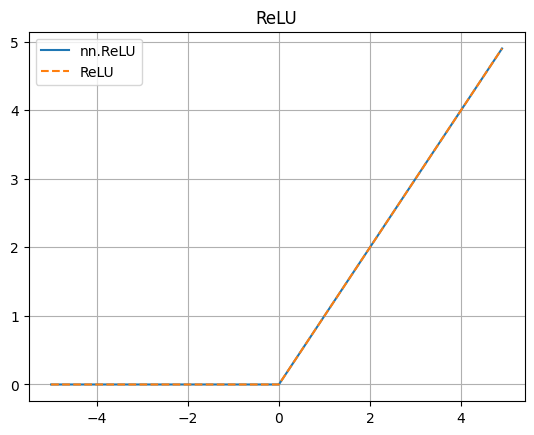

In [4]:
nn_relu = nn.ReLU()
relu = ReLU()

plt.plot(x,nn_relu(x),linestyle="-",label="nn.ReLU")
plt.plot(x,relu(x),linestyle="--",label="ReLU")
plt.title("ReLU")
plt.grid(True)
plt.legend()
plt.show()

## LeakyReLU

### Definition
$$
\text{LeakyReLU}_{\alpha}(x) =
\begin{cases}
x, & x > 0 \\
\alpha x, & x \le 0
\end{cases}
$$

* ✅ Non-negative gradient for negative input
* ❌ The slope $\alpha$ needs to be tunned 
* ❌ Cannot wipe the negative signal out 

Usually ($0<\alpha<1$) and in those cases the formula can be simplified to 
$$\text{LeakyReLU}_{\alpha}(x) = \max(x,\alpha x), \quad 0<\alpha<1.$$
Note: if $\alpha$ is learnable is called PReLU

### Code

In [5]:
class LeakyReLU(nn.Module):
    def __init__(self, a):
        super(LeakyReLU, self).__init__()
        self.a = a
        
    def forward(self, x):
        return torch.where(x>0,x, self.a*x)

### Testing

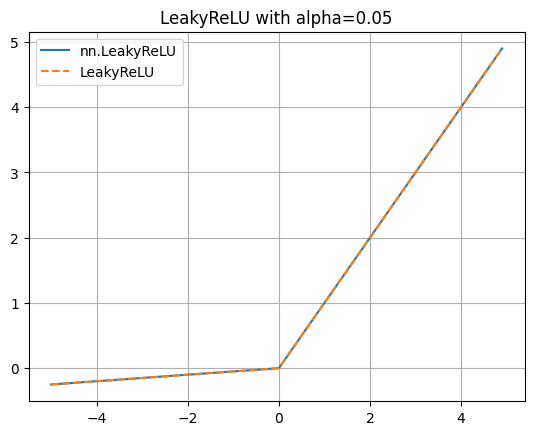

In [6]:
a = 0.05
nn_leaky_relu = nn.LeakyReLU(a)
leaky_relu = LeakyReLU(a)

plt.plot(x,nn_leaky_relu(x),linestyle="-",label="nn.LeakyReLU")
plt.plot(x,leaky_relu(x),linestyle="--",label="LeakyReLU")
plt.title(f"LeakyReLU with alpha={a}")
plt.grid(True)
plt.legend()
plt.show()

## PReLU
Learnable version of LeakyReLU

### Definition

Input: 
* $x\in \mathbb{R}$

Weight:
* $\alpha \in \mathbb{R}$

Output:
* $o \in \mathbb{R}$

$$
o = \text{PReLU}_{\alpha}(x) = \max(x,\alpha x), \quad 0<\alpha<1
$$

In [7]:
class PReLU(nn.Module):
    def __init__(self,init=0.25):
        super(PReLU, self).__init__()
        a = torch.empty(1)
        self.weight = nn.Parameter(a)
        nn.init.constant_(a, init)
        
    def forward(self, x):
        return torch.where(x>0,x, self.weight*x)

### Testing

#### weights

In [8]:
torch_prelu = nn.PReLU(init=a)
for name, param in torch_prelu.named_parameters():
    print(f"{name}: {param.data}")

weight: tensor([0.0500])


In [9]:
prelu = PReLU(init=a)
for name, param in torch_prelu.named_parameters():
    print(f"{name}: {param.data}")

weight: tensor([0.0500])


#### output

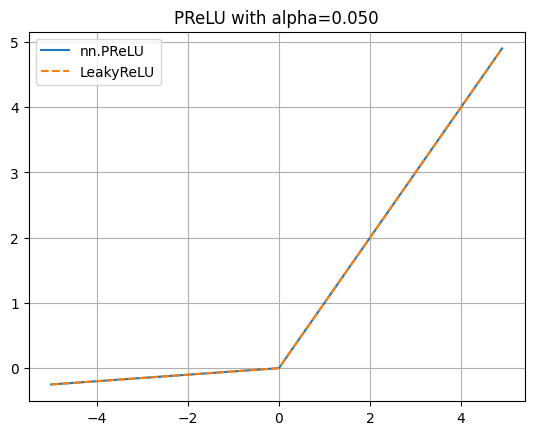

In [10]:
nn_prelu = nn.PReLU(init=a)
prelu = PReLU(init=a)

nn_y = torch_prelu(x)
y = prelu(x)
# Get the current slope parameter (alpha)
alpha = prelu.weight.item()

# Plot
plt.plot(x.numpy(), nn_y.detach().numpy(),linestyle="-", label='nn.PReLU')
plt.plot(x,y.detach().numpy(),linestyle="--",label="LeakyReLU")
plt.title(f"PReLU with alpha={alpha:.3f}")
plt.grid(True)
plt.legend()
plt.show()

## ELU (Exponential Linear Unit)

### Definition

$$
\text{ELU}_{\alpha}(x)=\begin{cases}
x,& \text{if } x\geq 0,\\
\alpha(e^x-1),& \text{if } x<0,\\
\end{cases}
$$

* ✅ Non-negative gradient for negative inputs
* ❌ $\alpha$ needs to be tunned
* ❌ Exponential function is computationally expensive

### Code

In [11]:
class ELU(nn.Module):
    def __init__(self, a):
        super(ELU, self).__init__()
        self.a = a
        
    def forward(self, x):
        return torch.where(x>0, x, self.a * (torch.exp(x) - 1))

### Testing

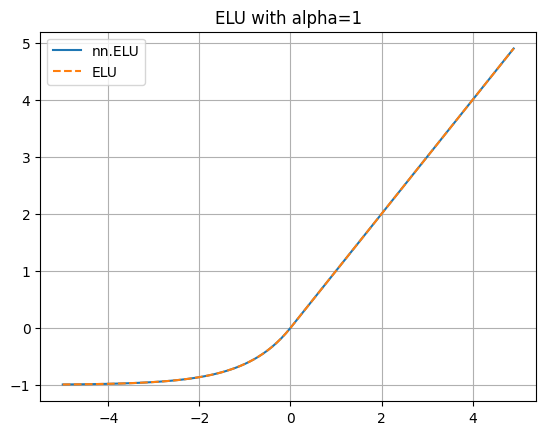

In [12]:
a = 1
nn_elu = nn.ELU(alpha=a)
elu = ELU(a)

plt.plot(x,nn_elu(x),linestyle="-",label="nn.ELU")
plt.plot(x,elu(x),linestyle="--",label="ELU")
plt.title(f"ELU with alpha={a}")
plt.grid(True)
plt.legend()
plt.show()

## SELU (Scaled ELU)

### Definition

$$
\text{SELU}(x)=\begin{cases}
\lambda x,& \text{if } x\geq 0,\\
\lambda\alpha(e^x-1),& \text{if } x<0,\\
\end{cases}
$$
​
where $\alpha$ and $\lambda$ are selected to preserve zero mean and unit variance across layers:
$$
\begin{align*}
\alpha &\approx 1.6732632423543772,\\
\lambda &\approx 1.0507009873554805.
\end{align*}
$$

* ✅ Non-negative gradient for negative inputs
* ❌ $\alpha$ needs to be tunned
* ❌ Exponential function is computationally expensive


### Code

In [13]:
class SELU(nn.Module):
    def __init__(self):
        super(SELU, self).__init__()
        self.alpha = 1.6732632423543772
        self.scale = 1.0507009873554805
        
    def forward(self, x):
        return self.scale * torch.where(x>0, x, self.alpha * (torch.exp(x) - 1))

### Testing

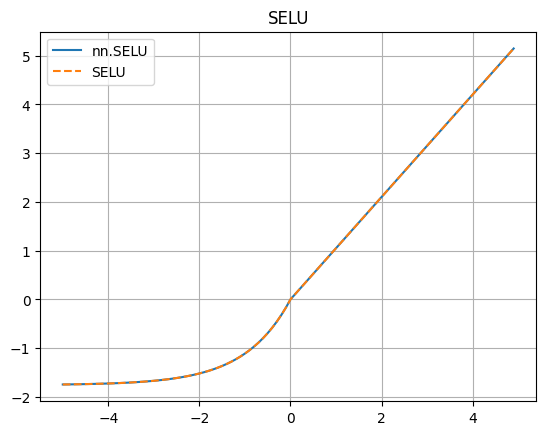

In [14]:
nn_selu = nn.SELU()
selu = SELU()

plt.plot(x,nn_selu(x),linestyle="-",label="nn.SELU")
plt.plot(x,selu(x),linestyle="--",label="SELU")
plt.title("SELU")
plt.grid(True)
plt.legend()
plt.show()

## GELU (Gaussian Error Linear Unit)

### Definition

$$
\text{GELU}(x) = x\Phi(x)
$$

where $\Phi$ is the CDF of the standard gaussian distribution

$$
\Phi(x)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x}e^{-\frac{t^2}{2}}dt.
$$

**Note:** This is computationally expensive, so, in practice, it is implemented using the approximation:

$$ 
\Phi(x) \approx 0.5\left[1 + \tanh\!\left(\sqrt{\frac{2}{\pi}}(x + 0.044715x^3)\right)\right] $$ 

* ✅ Non-zero gradient for negative inputs
* ❌ Requires more computation


### Code

In [15]:
class GELU(nn.Module):
    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(torch.sqrt(torch.tensor(2 / torch.pi)) * (x + 0.044715 * torch.pow(x, 3))))

#### Interpolation implementation

In [16]:
def normal_pdf(t: torch.Tensor) -> torch.Tensor:
    """Standard Gaussian PDF."""
    two_pi = torch.tensor(2.0 * torch.pi, device=t.device, dtype=t.dtype)
    return torch.exp(-0.5 * t*t) / torch.sqrt(two_pi)

def cumtrapz(y: torch.Tensor, x: torch.Tensor) -> torch.Tensor:
    """Cumulative trapezoid integral (like SciPy's cumtrapz, with an initial 0)."""
    dx = x[1:] - x[:-1]                         # (N-1,)
    incr = 0.5 * (y[:-1] + y[1:]) * dx          # (N-1,)
    out = torch.zeros_like(x)                    # (N,)
    out[1:] = torch.cumsum(incr, dim=0)
    return out

def interpolate(t,x,f):
    idx1 = torch.searchsorted(t, x, right=True)
    idx0 = idx1 -1

    t0, t1 = t[idx0], t[idx1]
    c0, c1 = f[idx0], f[idx1]

    w = (x - t0) / (t1 - t0)      
    return torch.lerp(c0, c1, w)

def normal_cdf(
    x: torch.Tensor, steps: int = 20001) -> torch.Tensor:
    # 1) Grid + PDF
    lower = x.min().item() - 1.0
    upper = x.max().item() + 1.0
    t   = torch.linspace(lower, upper, steps)  
    pdf = normal_pdf(t)                                                   

    # 2) Cumulative integral on the grid
    cdf_grid = cumtrapz(pdf, t)                                           
    return interpolate(t, x, f=cdf_grid)

def InterpGELU():
    def gelu(x):
        return x * normal_cdf(x)
    return gelu

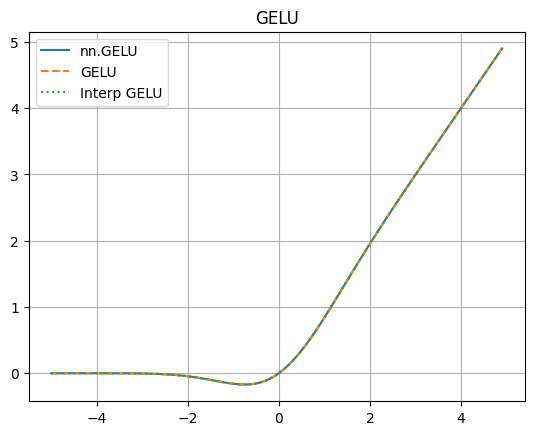

In [17]:
nn_gelu = nn.GELU()
interp_gelu = InterpGELU()
gelu = GELU()

plt.plot(x,nn_gelu(x),linestyle="-",label="nn.GELU")
plt.plot(x,gelu(x),linestyle="--",label="GELU")
plt.plot(x,interp_gelu(x),linestyle=":",label="Interp GELU")
plt.title("GELU")
plt.grid(True)
plt.legend()
plt.show()

## Sigmoid

### Definition
$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$

* ❌ Saturates on both sides
* ❌ No used nowdays

### Code

In [18]:
class Sigmoid(nn.Module):
    def forward(self, x):
        return 1 / (1 + torch.exp(-x))

### Testing

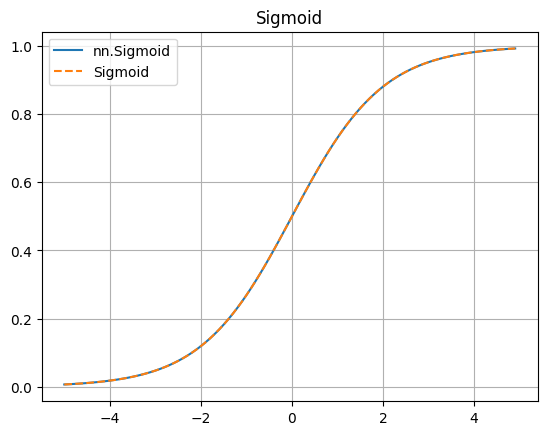

In [19]:
nn_sigmoid = nn.Sigmoid()
sigmoid = Sigmoid()

plt.plot(x,nn_sigmoid(x),linestyle="-",label="nn.Sigmoid")
plt.plot(x,sigmoid(x),linestyle="--",label="Sigmoid")
plt.title("Sigmoid")
plt.grid(True)
plt.legend()
plt.show()

## Thanh

### Definition
$$
\text{tanh}(x)=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}
$$

* ❌ Saturates on both sides
* ❌ No used nowdays

### Code

In [20]:
class Tanh(nn.Module):
    def forward(self, x):
        return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

### Testing

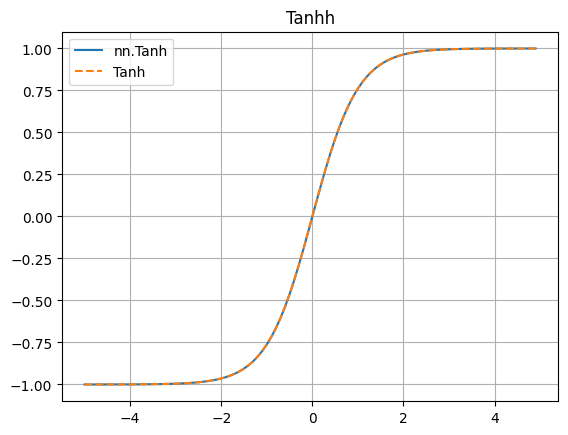

In [21]:
nn_tanh = nn.Tanh()
tanh = Tanh()

plt.plot(x,nn_tanh(x),linestyle="-",label="nn.Tanh")
plt.plot(x,tanh(x),linestyle="--",label="Tanh")
plt.title("Tanhh")
plt.grid(True)
plt.legend()
plt.show()

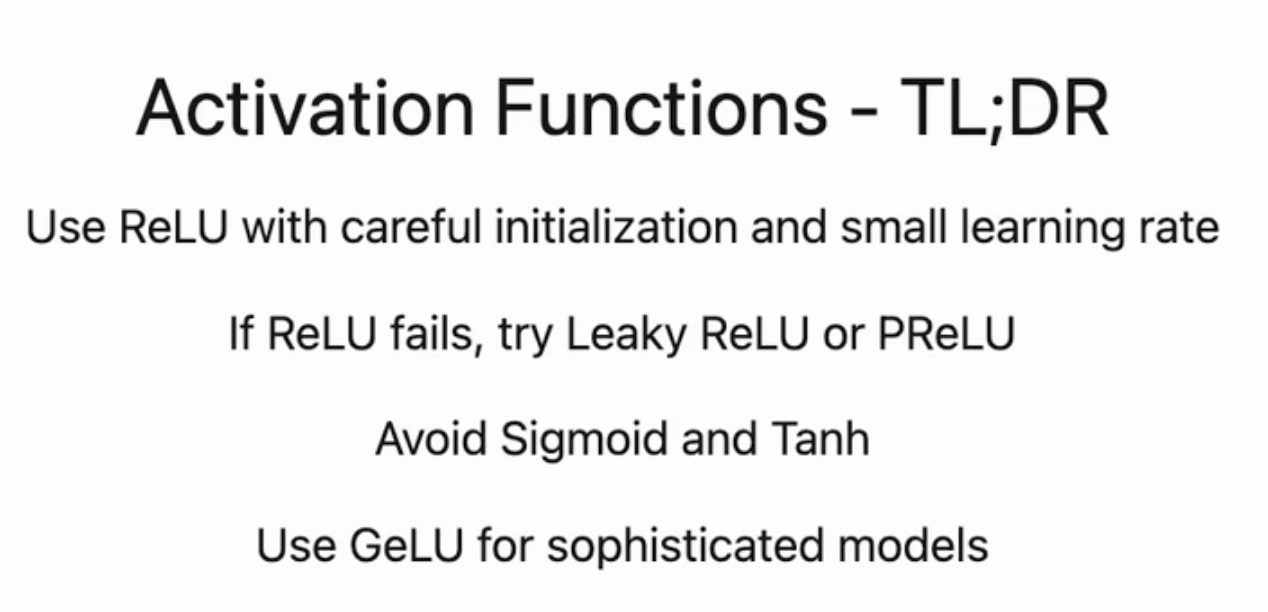